In [3]:
import pandas as pd
from web3 import Web3
import time

# Step 1: Load CSV
df = pd.read_csv("smart_logistics_data.csv")
print("🧾 Columns in CSV:", df.columns.tolist())
print(df.head())

# Step 2: Connect to Ganache
ganache_url = "http://127.0.0.1:7545"
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache!")
else:
    raise Exception("❌ Could not connect to Ganache. Please check RPC URL.")

# Step 3: Contract Setup
contract_address = Web3.to_checksum_address("0x764341289b813887941105621e23dd17382c7a4f")

# Set the default account (convert if necessary)
web3.eth.default_account = Web3.to_checksum_address("0x52e6af7e9DA5769ffc315B70a8BD0a79126F4dab")



# Updated ABI for IoTDataStorage
abi = [
	{
		"inputs": [],
		"stateMutability": "nonpayable",
		"type": "constructor"
	},
	{
		"anonymous": False,
		"inputs": [
			{
				"indexed": False,
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "packageId",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "temperature",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "latitude",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "longitude",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "status",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "rfidTag",
				"type": "string"
			},
			{
				"indexed": False,
				"internalType": "string",
				"name": "humidity",
				"type": "string"
			}
		],
		"name": "RowDataStored",
		"type": "event"
	},
	{
		"inputs": [],
		"name": "MAX_ENTRIES",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "dataRecords",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "packageId",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "temperature",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "latitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "longitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "status",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "rfidTag",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "humidity",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "index",
				"type": "uint256"
			}
		],
		"name": "getData",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "packageId",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "temperature",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "latitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "longitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "status",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "rfidTag",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "humidity",
				"type": "string"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getDataCount",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "owner",
		"outputs": [
			{
				"internalType": "address",
				"name": "",
				"type": "address"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "packageId",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "temperature",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "latitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "longitude",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "status",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "rfidTag",
				"type": "string"
			},
			{
				"internalType": "string",
				"name": "humidity",
				"type": "string"
			}
		],
		"name": "storeRowData",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	}
]

# Load the smart contract
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set default sender (first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]

print(f"✅ Connected to Smart Contract at {contract_address}")


def send_row_data(package_id, temperature, latitude, longitude, status, rfid_tag, humidity):
    txn = contract.functions.storeRowData(
        package_id,
        temperature,
        latitude,
        longitude,
        status,
        rfid_tag,
        humidity
    ).transact({
        'from': web3.eth.default_account,
        'gas': 300000
    })
    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"📦 Row Data | PackageId: {package_id} | ✅ Txn Hash: {receipt.transactionHash.hex()}")

# Step 5: Loop through and send all data
for _, row in df.iterrows():
    if contract.functions.getDataCount().call() >= 100:
        print("⚠️ Storage limit reached. Stopping data upload.")
        break

    package_id = str(row["shipment_id"])
    temperature = f"{row['package_temp_c']}°C"
    latitude = str(row["gps_lat"])
    longitude = str(row["gps_long"])
    status = str(row["status"])
    rfid_tag = str(row["rfid_tag"])
    humidity = f"{row['humidity_percent']}%"

    send_row_data(package_id, temperature, latitude, longitude, status, rfid_tag, humidity)
    time.sleep(0.1)  # prevent flooding

# Step 6: Retrieve and display records
total_records = contract.functions.getDataCount().call()
if total_records > 0:
    for i in range(total_records):
        try:
            # Retrieve the full row data from the smart contract
            record = contract.functions.getData(i).call()
            print(
                f"📄 Record {i}: "
                f"Timestamp={record[0]}, "
                f"PackageId={record[1]}, "
                f"Temperature={record[2]}, "
                f"Latitude={record[3]}, "
                f"Longitude={record[4]}, "
                f"Status={record[5]}"
            )
        except Exception as e:
            print(f"❌ Failed to retrieve record {i}: {e}")
else:
    print("⚠️ No records found.")

🧾 Columns in CSV: ['shipment_id', 'timestamp', 'gps_lat', 'gps_long', 'rfid_tag', 'package_temp_c', 'humidity_percent', 'status']
  shipment_id                   timestamp    gps_lat    gps_long  rfid_tag  \
0   SHP980988  2025-05-15 13:52:59.194834  11.721861  122.739816  RFID1098   
1   SHP650973  2025-05-15 07:19:59.194993  13.051399  121.518155  RFID1063   
2   SHP339067  2025-05-15 05:03:59.195050  13.867232  122.339907  RFID1010   
3   SHP328994  2025-05-15 20:11:59.195101  14.814776  122.012883  RFID1096   
4   SHP634775  2025-05-15 15:02:59.195151  10.127991  120.478309  RFID1037   

   package_temp_c  humidity_percent            status  
0            6.80             43.68        In Transit  
1            9.49             59.35    Arrived at Hub  
2            6.63             34.58           Delayed  
3            9.23             30.99           Delayed  
4            8.04             46.65  Out for Delivery  
✅ Connected to Ganache!
✅ Connected to Smart Contract at 0x764341

In [4]:
total_records = contract.functions.getDataCount().call()
print(f"📊 Total IoT records stored: {total_records}")

📊 Total IoT records stored: 100


In [5]:
import pandas as pd
import numpy as np

# Create a DataFrame from the retrieved records
data = []
total_records = contract.functions.getDataCount().call()

for i in range(total_records):
    try:
        # Retrieve the full row data from the smart contract
        record = contract.functions.getData(i).call()
        data.append({
            "timestamp": record[0],
            "package_id": record[1],
            "temperature": record[2],
            "latitude": record[3],
            "longitude": record[4],
            "status": record[5],
            "rfid_tag": record[6],
            "humidity": record[7],
        })
    except Exception as e:
        print(f"❌ Failed to retrieve record {i}: {e}")

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Handle missing values
df.fillna("", inplace=True)

import re

def extract_numeric(value):
    """Extracts the first floating point number from a string, or returns NaN if not found."""
    if pd.isnull(value):
        return np.nan
    match = re.search(r"[-+]?\d*\.\d+|\d+", str(value))
    return float(match.group()) if match else np.nan

# Preprocess numerical values
df["temperature"] = df["temperature"].apply(extract_numeric)
df["humidity"] = df["humidity"].apply(extract_numeric)
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

# Handle missing numerical values
df["temperature"] = df["temperature"].fillna(df["temperature"].mean())
df["humidity"] = df["humidity"].fillna(df["humidity"].mean())
df["latitude"] = df["latitude"].fillna(0)
df["longitude"] = df["longitude"].fillna(0) 

# Save the cleaned data to a CSV file
df.to_csv("cleaned_iot_data.csv", index=False)
print("✅ Cleaned IoT data saved successfully as cleaned_iot_data.csv")

✅ Cleaned IoT data saved successfully as cleaned_iot_data.csv


In [6]:
import pandas as pd


# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")


# Display first few rows to verify data
print(df.head())

    timestamp package_id  temperature   latitude   longitude  \
0  1749927156  SHP980988         6.80  11.721861  122.739816   
1  1749927156  SHP650973         9.49  13.051399  121.518155   
2  1749927156  SHP339067         6.63  13.867232  122.339907   
3  1749927156  SHP328994         9.23  14.814776  122.012883   
4  1749927157  SHP634775         8.04  10.127991  120.478309   

             status  rfid_tag  humidity  
0        In Transit  RFID1098     43.68  
1    Arrived at Hub  RFID1063     59.35  
2           Delayed  RFID1010     34.58  
3           Delayed  RFID1096     30.99  
4  Out for Delivery  RFID1037     46.65  


In [7]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style="whitegrid")


C:\Users\chang\AppData\Local\Temp\ipykernel_8420\4018584445.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


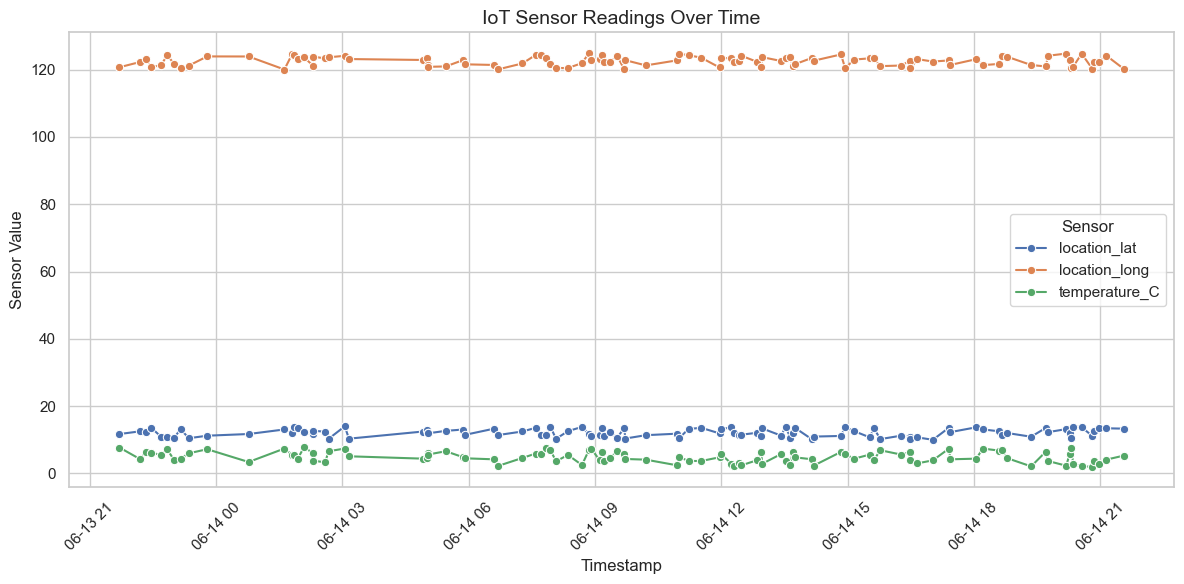

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load & parse
df = pd.read_csv("iot_data.csv", parse_dates=["timestamp"])

# 2) Melt all numeric columns into long form
sensor_cols = df.select_dtypes(include="number").columns.tolist()
df_long = df.melt(
    id_vars="timestamp",
    value_vars=sensor_cols,
    var_name="Sensor",
    value_name="Value"
)

# 3) Plot both lines on one Axes, disable CI shading
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_long,
    x="timestamp", y="Value",
    hue="Sensor",
    marker="o",
    estimator=None,   # draw the raw data, not the mean
    ci=None           # turn off the shaded confidence‐interval
)

plt.xticks(rotation=45)
plt.title("IoT Sensor Readings Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)
plt.legend(title="Sensor")
plt.tight_layout()
plt.show()
